In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [14]:
datasets = ['6_cardio', '18_ionoshere', '4_breastw', '42_WBC']

6_cardio


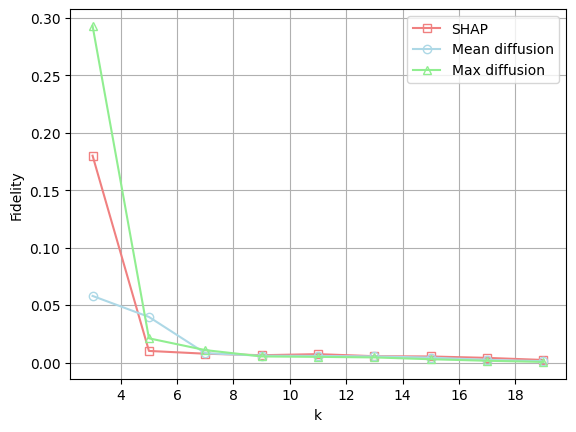

File fidelity_18_ionoshere.csv not found.
4_breastw


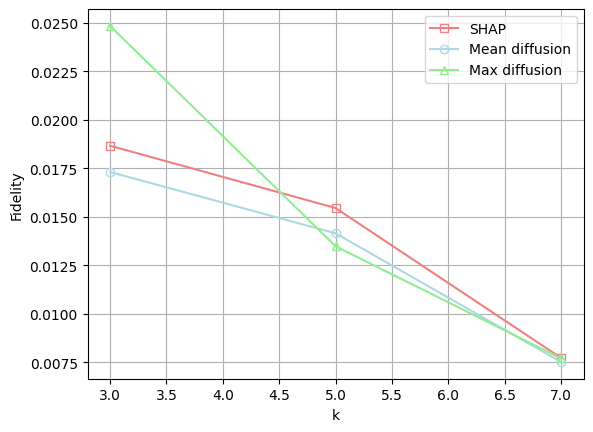

42_WBC


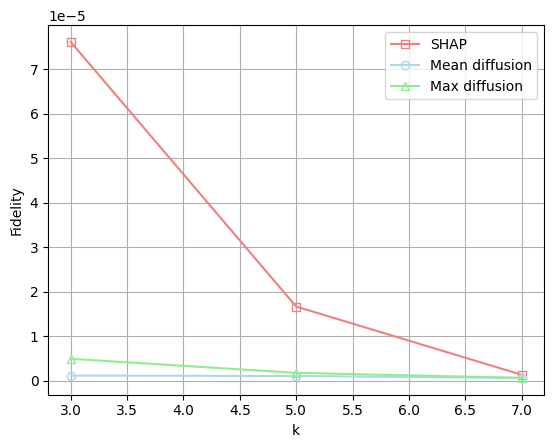

In [21]:
# Fidelity
for dataset in datasets:
    try:
        fidelity_df = pd.read_csv(f'fidelity_{dataset}.csv')
    except FileNotFoundError:
        print(f"File fidelity_{dataset}.csv not found.")
        continue
    plt.plot(fidelity_df['k'], fidelity_df['shap'], label='SHAP', marker='s', linestyle='-', color='lightcoral', markerfacecolor='none')
    plt.plot(fidelity_df['k'], fidelity_df['mean'], label='Mean diffusion', marker='o', linestyle='-', color='lightblue', markerfacecolor='none')
    plt.plot(fidelity_df['k'], fidelity_df['max'], label='Max diffusion', marker='^', linestyle='-', color='lightgreen', markerfacecolor='none')
    plt.xlabel('k')
    plt.ylabel('Fidelity')
    plt.grid()
    plt.legend()
    print(dataset)
    plt.savefig(f'fidelity_{dataset}.png', dpi=300, bbox_inches='tight')
    plt.show()

6_cardio


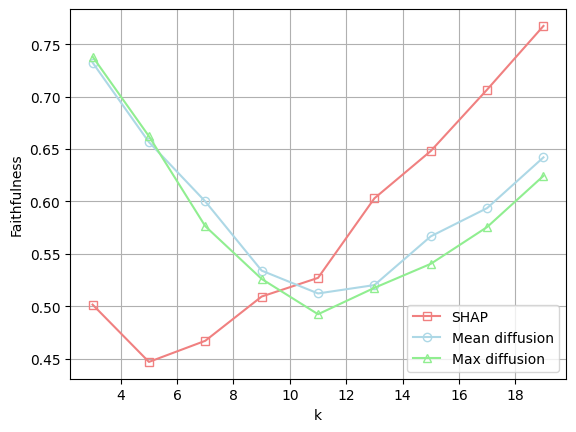

    k      shap      mean       max       our
0   3  0.501464  0.732427  0.738120  0.716208
1   5  0.446766  0.656508  0.662099  0.655493
2   7  0.466934  0.599873  0.576228  0.575841
3   9  0.509156  0.533887  0.525944  0.541271
4  11  0.526958  0.512099  0.492259  0.516931
5  13  0.602868  0.520093  0.517452  0.522195
6  15  0.648002  0.566589  0.540341  0.566938
7  17  0.706596  0.593542  0.575458  0.588681
8  19  0.767367  0.641968  0.624331  0.645151
File fidelity_18_ionoshere.csv not found.
4_breastw


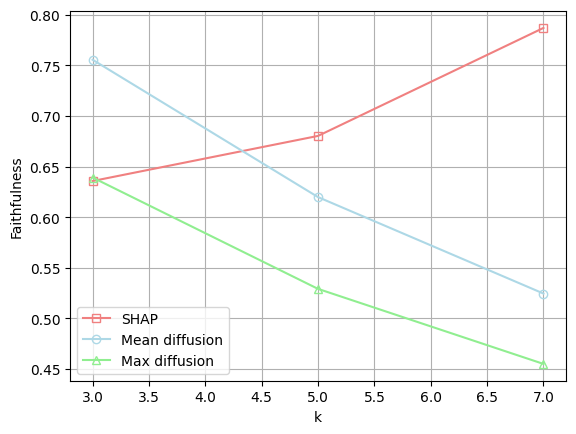

   k      shap      mean       max       our
0  3  0.635643  0.755457  0.639120  0.749162
1  5  0.680216  0.619793  0.529146  0.621750
2  7  0.786862  0.524518  0.455032  0.533387
42_WBC


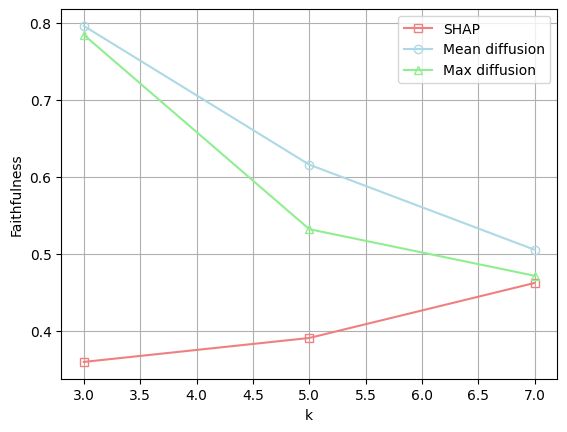

   k      shap      mean       max       our
0  3  0.359392  0.795898  0.784276  0.758675
1  5  0.390520  0.615652  0.531850  0.580277
2  7  0.462022  0.505058  0.471301  0.540516


In [24]:
# Faithfulness
for dataset in datasets:
    try:
        faithfulness_df = pd.read_csv(f'faithfulness_{dataset}.csv')
    except FileNotFoundError:
        print(f"File fidelity_{dataset}.csv not found.")
        continue
    # Rename index column to 'k'
    faithfulness_df.rename(columns={'index': 'k'}, inplace=True)
    plt.plot(faithfulness_df['k'], faithfulness_df['shap'], label='SHAP', marker='s', linestyle='-', color='lightcoral', markerfacecolor='none')
    plt.plot(faithfulness_df['k'], faithfulness_df['mean'], label='Mean diffusion', marker='o', linestyle='-', color='lightblue', markerfacecolor='none')
    plt.plot(faithfulness_df['k'], faithfulness_df['max'], label='Max diffusion', marker='^', linestyle='-', color='lightgreen', markerfacecolor='none')
    plt.xlabel('k')
    plt.ylabel('Faithfulness')
    print(dataset)
    plt.grid()
    plt.legend()
    plt.savefig(f'faithfulness_{dataset}.png', dpi=300, bbox_inches='tight')
    plt.show()
    print(faithfulness_df)


In [25]:
# Infidelity
merged_df = pd.DataFrame()  # Initialize an empty dataframe to store merged data

for dataset in datasets:
    try:
        infidelity_df = pd.read_csv(f'infidelity_{dataset}.csv')
    except FileNotFoundError:
        print(f"File infidelity_{dataset}.csv not found.")
        continue
    # Add dataset name as a column
    infidelity_df['dataset'] = dataset
    # Append to the merged dataframe
    merged_df = pd.concat([merged_df, infidelity_df], ignore_index=True)

# Compute mean per column grouped by dataset
merged_df_mean = merged_df.groupby('dataset').mean()

# Turn it to LaTeX table
merged_df_mean_latex = merged_df_mean.to_latex()

# Print the LaTeX table
print(merged_df_mean_latex)


File infidelity_18_ionoshere.csv not found.
\begin{tabular}{lrrrr}
\toprule
 & inf_our & inf_shap & inf_mean & inf_max \\
dataset &  &  &  &  \\
\midrule
42_WBC & 0.000003 & 0.000002 & 0.000003 & 0.000003 \\
4_breastw & 0.000010 & 0.000011 & 0.000011 & 0.000011 \\
6_cardio & 0.000005 & 0.000006 & 0.000005 & 0.000005 \\
\bottomrule
\end{tabular}

